**ARVORE DE DECISÃO**
# ------------------------------------------------------------------------------------------------------------------------------

In [ ]:
#Carregando as bibliotecas
import pandas as pd
import numpy as np
from google.colab import files

In [ ]:
#Carregando a base de dados
uploaded=files.upload()

#Armazenando a base de dados em uma variável
census = pd.read_csv('census.csv')

#Exibindo as colunas
census.columns

Saving census.csv to census.csv


Index(['Unnamed: 0', 'age', 'workclass', 'final.weight', 'education',
       'education.num', 'marital.status', 'occupation', 'relationship', 'race',
       'sex', 'capital.gain', 'capital.loos', 'hour.per.week',
       'native.country', 'income'],
      dtype='object')

In [ ]:
#Identificar o tipo de cada variável
print(census.dtypes)

Unnamed: 0         int64
age                int64
workclass         object
final.weight       int64
education         object
education.num      int64
marital.status    object
occupation        object
relationship      object
race              object
sex               object
capital.gain       int64
capital.loos       int64
hour.per.week      int64
native.country    object
income            object
dtype: object


In [ ]:
#Ver as 5 primeiras linhas dos dados
census.head()

In [ ]:
#Removendo as colunas que não contribuem para o método de previsão
census = census.drop(['Unnamed: 0','final.weight','education.num','capital.gain',
                      'capital.loos','income'], axis=1)

In [ ]:
#Exibindo as colunas que sobraram
census.columns

In [ ]:
#Exibindo os tipos de dados
census.info()

In [ ]:
#Limitando a variável target aos 4 valores que mais aparecem no Dataset
mask = census['occupation'].value_counts().head(4).index    
census = census.loc[census['occupation'].isin(mask)]

In [ ]:
#Criando dataframes com colunas convertidas para valores numéricos
age = pd.get_dummies(census['age'],drop_first=True)
workclass = pd.get_dummies(census['workclass'],drop_first=True)
education = pd.get_dummies(census['education'],drop_first=True)
marital_status = pd.get_dummies(census['marital.status'],drop_first=True)
relationship = pd.get_dummies(census['relationship'],drop_first=True)
race = pd.get_dummies(census['race'],drop_first=True)
sex = pd.get_dummies(census['sex'],drop_first=True)
hour_per_week = pd.get_dummies(census['hour.per.week'],drop_first=True)
native_country = pd.get_dummies(census['native.country'],drop_first=True)

In [ ]:
#Eliminando as colunas com valores não numéricos
census.drop(['age','workclass','education','marital.status','relationship',
           'race','sex','hour.per.week','native.country'],axis=1, inplace=True)

In [ ]:
#Concatendo as colunas numéricas com o dataframe census
census = pd.concat([census,age,workclass,education,marital_status,relationship,
               race,sex,hour_per_week,native_country],axis=1)

In [ ]:
#Verificando o dataframe
census.head()

In [ ]:
#Exibindo os tipos de dados
census.info()

In [ ]:
#Definindo as variáveis que serão usadas como parâmetro para treinos e testes

X = census.drop('occupation',axis=1)

y = census['occupation']

In [ ]:
#Definindo os dados para treino e teste
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.15)

In [ ]:
#Exibindo os dados de treino
X_train

In [ ]:
#Exibindo os dados de teste
y_test

In [ ]:
#Treinando o modelo
from sklearn import tree

clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=7) 
clf = clf.fit(X_train, y_train) 
predictions = clf.predict(X_test)

In [ ]:
#Imprimindo a matriz de confusão
import pandas as pd 
print("\nMatriz de confusão detalhada:\n", 
      pd.crosstab(y_test, predictions, rownames=['Real'], colnames=['Predito'], 
      margins=True, margins_name='Todos'))


Matriz de confusão detalhada:
 Predito            Adm-clerical   Craft-repair  ...   Prof-specialty  Todos
Real                                            ...                        
 Adm-clerical               335            131  ...               82    578
 Craft-repair                31            512  ...               13    601
 Exec-managerial             93            169  ...              130    590
 Prof-specialty              80             83  ...              291    599
Todos                       539            895  ...              516   2368

[5 rows x 5 columns]


In [ ]:
#Imprimindo a precisão dos resultados de forma detalhada
import sklearn.metrics as metrics 
print("Relatório sobre a qualidade:\n") 
print(metrics.classification_report(y_test, predictions, target_names=['Adm-clerical','Craft-repair','Exec-managerial','Prof-specialty']))

Relatório sobre a qualidade:

                 precision    recall  f1-score   support

   Adm-clerical       0.62      0.58      0.60       578
   Craft-repair       0.57      0.85      0.68       601
Exec-managerial       0.47      0.34      0.39       590
 Prof-specialty       0.56      0.49      0.52       599

       accuracy                           0.56      2368
      macro avg       0.56      0.56      0.55      2368
   weighted avg       0.56      0.56      0.55      2368



In [ ]:
#Imprimindo a precisão dos resultados de forma geral
from sklearn.model_selection import cross_val_score
clf.score(X_test, y_test)

0.5641891891891891

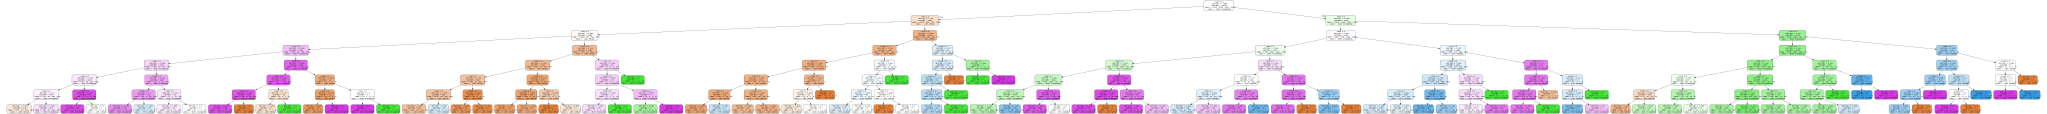

In [ ]:
#Gerando a árvore de decisão
import graphviz 
dot_data = tree.export_graphviz(clf, out_file=None) 
graph = graphviz.Source(dot_data) 
graph.render("census") 
dot_data = tree.export_graphviz(clf, out_file=None, 
                                feature_names=None, 
                                class_names=y.reset_index(drop=True), 
                                filled=True, rounded=True, 
                                special_characters=True) 
graph = graphviz.Source(dot_data, format="png") 
graph

**REGRESSÃO LOGISTICA**
# ------------------------------------------------------------------------------------------------------------------------------

In [ ]:
#Carregando as bibliotecas
import pandas as pd
import numpy as np
from google.colab import files

In [ ]:
#Carregando a base de dados
uploaded=files.upload()

#Armazenando a base de dados em uma variável
census = pd.read_csv('census.csv')

#Exibindo as colunas
census.columns

In [ ]:
#Identificar o tipo de cada variável
print(census.dtypes)

In [ ]:
#Ver as 5 primeiras linhas dos dados
census.head()

In [ ]:
#Removendo as colunas que não contribuem para o método de previsão
census = census.drop(['Unnamed: 0','final.weight','education.num','capital.gain',
                      'capital.loos','income'], axis=1)

In [ ]:
#Exibindo as colunas que sobraram
census.columns

In [ ]:
#Exibindo os tipos de dados
census.info()

In [ ]:
#Limitando a variável target aos 4 valores que mais aparecem no Dataset
mask = census['occupation'].value_counts().head(4).index    
census = census.loc[census['occupation'].isin(mask)]

In [ ]:
#Criando dataframes com colunas convertidas para valores numéricos
age = pd.get_dummies(census['age'],drop_first=True)
workclass = pd.get_dummies(census['workclass'],drop_first=True)
education = pd.get_dummies(census['education'],drop_first=True)
marital_status = pd.get_dummies(census['marital.status'],drop_first=True)
relationship = pd.get_dummies(census['relationship'],drop_first=True)
race = pd.get_dummies(census['race'],drop_first=True)
sex = pd.get_dummies(census['sex'],drop_first=True)
hour_per_week = pd.get_dummies(census['hour.per.week'],drop_first=True)
native_country = pd.get_dummies(census['native.country'],drop_first=True)

In [ ]:
#Eliminando as colunas com valores não numéricos
census.drop(['age','workclass','education','marital.status','relationship',
           'race','sex','hour.per.week','native.country'],axis=1, inplace=True)

In [ ]:
#Concatendo as colunas numéricas com o dataframe census
census = pd.concat([census,age,workclass,education,marital_status,relationship,
               race,sex,hour_per_week,native_country],axis=1)

In [ ]:
#Verificando o dataframe
census.head()

In [ ]:
#Exibindo os tipos de dados
census.info()

In [ ]:
#Definindo as variáveis que serão usadas como parâmetro para treinos e testes

X = census.drop('occupation',axis=1)

y = census['occupation']

In [ ]:
#Definindo os dados para treino e teste
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.20)

In [ ]:
#Exibindo os dados de treino
X_train

In [ ]:
#Exibindo os dados de teste
y_test

In [ ]:
#Treinando o modelo
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression(solver='lbfgs',max_iter=1000)

logmodel.fit(X_train,y_train)

predictions = logmodel.predict(X_test)

In [ ]:
#Imprimindo a matriz de confusão
import pandas as pd 
print("\nMatriz de confusão detalhada:\n", 
      pd.crosstab(y_test, predictions, rownames=['Real'], colnames=['Predito'], 
      margins=True, margins_name='Todos'))

In [ ]:
#Imprimindo a precisão dos resultados de forma detalhada
import sklearn.metrics as metrics 
print("Relatório sobre a qualidade:\n") 
print(metrics.classification_report(y_test, predictions, target_names=['Adm-clerical','Craft-repair','Exec-managerial','Prof-specialty']))

In [ ]:
#Imprimindo a precisão dos resultados de forma geral
from sklearn.model_selection import cross_val_score
logmodel.score(X_test, y_test)

In [ ]:
#Executando uma previsão com a própria base de dados census
import pandas as pd
import numpy as np

predict_value = census[:1]

predict_value = predict_value.drop('occupation', axis=1)

predict_value = pd.get_dummies(predict_value)

predict_value = predict_value.values

predict_value


y_predict = logmodel.predict(predict_value)
print(y_predict)

**KNN**
# ------------------------------------------------------------------------------------------------------------------------------

In [ ]:
#Carregando as bibliotecas
import pandas as pd
import numpy as np
from google.colab import files

In [ ]:
#Carregando a base de dados
uploaded=files.upload()

#Armazenando a base de dados em uma variável
census = pd.read_csv('census.csv')

#Exibindo as colunas
census.columns

In [ ]:
#Identificar o tipo de cada variável
print(census.dtypes)

In [ ]:
#Ver as 5 primeiras linhas dos dados
census.head()

In [ ]:
#Removendo as colunas que não contribuem para o método de previsão
census = census.drop(['Unnamed: 0','final.weight','education.num','capital.gain',
                      'capital.loos','income'], axis=1)

In [ ]:
#Exibindo as colunas que sobraram
census.columns

In [ ]:
#Exibindo os tipos de dados
census.info()

In [ ]:
#Limitando a variável target aos 4 valores que mais aparecem no Dataset
mask = census['occupation'].value_counts().head(4).index    
census = census.loc[census['occupation'].isin(mask)]

In [ ]:
#Criando dataframes com colunas convertidas para valores numéricos
age = pd.get_dummies(census['age'],drop_first=True)
workclass = pd.get_dummies(census['workclass'],drop_first=True)
education = pd.get_dummies(census['education'],drop_first=True)
marital_status = pd.get_dummies(census['marital.status'],drop_first=True)
relationship = pd.get_dummies(census['relationship'],drop_first=True)
race = pd.get_dummies(census['race'],drop_first=True)
sex = pd.get_dummies(census['sex'],drop_first=True)
hour_per_week = pd.get_dummies(census['hour.per.week'],drop_first=True)
native_country = pd.get_dummies(census['native.country'],drop_first=True)

In [ ]:
#Eliminando as colunas com valores não numéricos
census.drop(['age','workclass','education','marital.status','relationship',
           'race','sex','hour.per.week','native.country'],axis=1, inplace=True)

In [ ]:
#Concatendo as colunas numéricas com o dataframe census
census = pd.concat([census,age,workclass,education,marital_status,relationship,
               race,sex,hour_per_week,native_country],axis=1)

In [ ]:
#Verificando o dataframe
census.head()

In [ ]:
#Exibindo os tipos de dados
census.info()

In [ ]:
#Definindo as variáveis que serão usadas como parâmetro para treinos e testes

X = census.drop('occupation',axis=1)

y = census['occupation']

In [ ]:
#Definindo os dados para treino e teste
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.10)

In [ ]:
#Exibindo os dados de treino
X_train

In [ ]:
#Exibindo os dados de teste
y_test

In [ ]:
#Treinando o modelo
from sklearn.neighbors import KNeighborsClassifier

logmodel = KNeighborsClassifier()

logmodel.fit(X_train,y_train)

predictions = logmodel.predict(X_test)

In [ ]:
#Imprimindo a matriz de confusão
import pandas as pd 
print("\nMatriz de confusão detalhada:\n", 
      pd.crosstab(y_test, predictions, rownames=['Real'], colnames=['Predito'], 
      margins=True, margins_name='Todos'))

In [ ]:
#Imprimindo a precisão dos resultados de forma detalhada
import sklearn.metrics as metrics 
print("Relatório sobre a qualidade:\n") 
print(metrics.classification_report(y_test, predictions, target_names=['Adm-clerical','Craft-repair','Exec-managerial','Prof-specialty']))

In [ ]:
#Imprimindo a precisão dos resultados de forma geral
from sklearn.model_selection import cross_val_score
logmodel.score(X_test, y_test)

In [ ]:
#Executando uma previsão com a própria base de dados census
import pandas as pd
import numpy as np

predict_value = census[:1]

predict_value = predict_value.drop('occupation', axis=1)

predict_value = pd.get_dummies(predict_value)

predict_value = predict_value.values

predict_value


y_predict = logmodel.predict(predict_value)
print(y_predict)

**NAIVE-BAYES**
# ------------------------------------------------------------------------------------------------------------------------------

In [ ]:
#Carregando as bibliotecas
import pandas as pd
import numpy as np
from google.colab import files

In [ ]:
#Carregando a base de dados
uploaded=files.upload()

#Armazenando a base de dados em uma variável
census = pd.read_csv('census.csv')

#Exibindo as colunas
census.columns

In [ ]:
#Identificar o tipo de cada variável
print(census.dtypes)

In [ ]:
#Ver as 5 primeiras linhas dos dados
census.head()

In [ ]:
#Removendo as colunas que não contribuem para o método de previsão
census = census.drop(['Unnamed: 0','final.weight','education.num','capital.gain',
                      'capital.loos','income'], axis=1)

In [ ]:
#Exibindo as colunas que sobraram
census.columns

In [ ]:
#Exibindo os tipos de dados
census.info()

In [ ]:
#Limitando a variável target aos 4 valores que mais aparecem no Dataset
mask = census['occupation'].value_counts().head(4).index    
census = census.loc[census['occupation'].isin(mask)]

In [ ]:
#Exibindo o conteúdo da coluna target
census.head()

In [ ]:
#Criando dataframes com colunas convertidas para valores numéricos
age = pd.get_dummies(census['age'],drop_first=True)
workclass = pd.get_dummies(census['workclass'],drop_first=True)
education = pd.get_dummies(census['education'],drop_first=True)
marital_status = pd.get_dummies(census['marital.status'],drop_first=True)
relationship = pd.get_dummies(census['relationship'],drop_first=True)
race = pd.get_dummies(census['race'],drop_first=True)
sex = pd.get_dummies(census['sex'],drop_first=True)
hour_per_week = pd.get_dummies(census['hour.per.week'],drop_first=True)
native_country = pd.get_dummies(census['native.country'],drop_first=True)

In [ ]:
#Eliminando as colunas com valores não numéricos
census.drop(['age','workclass','education','marital.status','relationship',
           'race','sex','hour.per.week','native.country'],axis=1, inplace=True)

In [ ]:
#Concatendo as colunas numéricas com o dataframe census
census = pd.concat([census,age,workclass,education,marital_status,relationship,
               race,sex,hour_per_week,native_country],axis=1)

In [ ]:
#Verificando o dataframe
census.head()

In [ ]:
#Exibindo os tipos de dados
census.info()

In [ ]:
#Definindo as variáveis que serão usadas como parâmetro para treinos e testes

X = census.drop('occupation',axis=1)

y = census['occupation']

In [ ]:
#Definindo os dados para treino e teste
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.20)

In [ ]:
#Exibindo os dados de treino
X_train

In [ ]:
#Exibindo os dados de teste
y_test

In [ ]:
#Treinando o modelo

from sklearn.naive_bayes import BernoulliNB

logmodel = BernoulliNB()
logmodel.fit(X_train, y_train)
predictions = logmodel.predict(X_test)

In [ ]:
#Imprimindo a matriz de confusão
import pandas as pd 
print("\nMatriz de confusão detalhada:\n", 
      pd.crosstab(y_test, predictions, rownames=['Real'], colnames=['Predito'], 
      margins=True, margins_name='Todos'))

In [ ]:
#Imprimindo a precisão dos resultados de forma detalhada
import sklearn.metrics as metrics 
print("Relatório sobre a qualidade:\n") 
print(metrics.classification_report(y_test, predictions, target_names=['Adm-clerical','Craft-repair','Exec-managerial', 'Prof-specialty']))

In [ ]:
#Imprimindo a precisão dos resultados de forma geral
from sklearn.model_selection import cross_val_score
logmodel.score(X_test, y_test)

In [ ]:
#Executando uma previsão com a própria base de dados census
import pandas as pd
import numpy as np

predict_value = census[:1]

predict_value = predict_value.drop('occupation', axis=1)

predict_value = pd.get_dummies(predict_value)

predict_value = predict_value.values

predict_value


y_predict = logmodel.predict(predict_value)
print(y_predict)

**REDES NEURAIS**
# ------------------------------------------------------------------------------------------------------------------------------

In [ ]:
#Carregando as bibliotecas
import pandas as pd
import numpy as np
from google.colab import files

In [ ]:
#Carregando a base de dados
uploaded=files.upload()

#Armazenando a base de dados em uma variável
census = pd.read_csv('census.csv')

#Exibindo as colunas
census.columns

In [ ]:
#Identificar o tipo de cada variável
print(census.dtypes)

In [ ]:
#Ver as 5 primeiras linhas dos dados
census.head()

In [ ]:
#Removendo as colunas que não contribuem para o método de previsão
census = census.drop(['Unnamed: 0','final.weight','education.num','capital.gain',
                      'capital.loos','income'], axis=1)

In [ ]:
#Exibindo as colunas que sobraram
census.columns

In [ ]:
#Exibindo os tipos de dados
census.info()

In [ ]:
#Limitando a variável target aos 4 valores que mais aparecem no Dataset
mask = census['occupation'].value_counts().head(4).index    
census = census.loc[census['occupation'].isin(mask)]

In [ ]:
#Exibindo o conteúdo da coluna target
census.head()

In [ ]:
#Criando dataframes com colunas convertidas para valores numéricos
age = pd.get_dummies(census['age'],drop_first=True)
workclass = pd.get_dummies(census['workclass'],drop_first=True)
education = pd.get_dummies(census['education'],drop_first=True)
marital_status = pd.get_dummies(census['marital.status'],drop_first=True)
relationship = pd.get_dummies(census['relationship'],drop_first=True)
race = pd.get_dummies(census['race'],drop_first=True)
sex = pd.get_dummies(census['sex'],drop_first=True)
hour_per_week = pd.get_dummies(census['hour.per.week'],drop_first=True)
native_country = pd.get_dummies(census['native.country'],drop_first=True)

In [ ]:
#Eliminando as colunas com valores não numéricos
census.drop(['age','workclass','education','marital.status','relationship',
           'race','sex','hour.per.week','native.country'],axis=1, inplace=True)

In [ ]:
#Concatendo as colunas numéricas com o dataframe census
census = pd.concat([census,age,workclass,education,marital_status,relationship,
               race,sex,hour_per_week,native_country],axis=1)

In [ ]:
#Verificando o dataframe
census.head()

In [ ]:
#Exibindo os tipos de dados
census.info()

In [ ]:
#Definindo as variáveis que serão usadas como parâmetro para treinos e testes

X = census.drop('occupation',axis=1)

y = census['occupation']

In [ ]:
#Definindo os dados para treino e teste
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.20)

In [ ]:
#Exibindo os dados de treino
X_train

In [ ]:
#Exibindo os dados de teste
y_test

In [ ]:
#Treinando o modelo

from sklearn.neural_network import MLPClassifier

logmodel = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(3, 3), random_state=1)
logmodel.fit(X_train, y_train)
prediction = logmodel.predict(X_test)

In [ ]:
#Imprimindo a matriz de confusão
import pandas as pd 
print("\nMatriz de confusão detalhada:\n", 
      pd.crosstab(y_test, prediction, rownames=['Real'], colnames=['Predito'], 
      margins=True, margins_name='Todos'))

In [ ]:
#Imprimindo a precisão dos resultados de forma detalhada
import sklearn.metrics as metrics 
print("Relatório sobre a qualidade:\n") 
print(metrics.classification_report(y_test, prediction, target_names=['Adm-clerical','Craft-repair','Exec-managerial', 'Prof-specialty']))

In [ ]:
#Imprimindo a precisão dos resultados de forma geral
from sklearn.model_selection import cross_val_score
logmodel.score(X_test, y_test)

In [ ]:
#Executando uma previsão com a própria base de dados census
import pandas as pd
import numpy as np

predict_value = census[:1]

predict_value = predict_value.drop('occupation', axis=1)

predict_value = pd.get_dummies(predict_value)

predict_value = predict_value.values

predict_value


y_predict = logmodel.predict(predict_value)
print(y_predict)